In [1]:
# Machine Learning Library
import pandas as pd
import numpy as np
import pickle
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

pandas: Data manipulation and analysis library. Provides data structures like DataFrame to work with structured data easily.

numpy: Fundamental package for numerical computing in Python. Supports large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

pickle: Python module for serializing (saving) and deserializing (loading) Python object structures, making it easy to save models or data.

nltk: Natural Language Toolkit, used for working with human language data (text). Provides tools for text processing like tokenization, stemming, and more.

re: Regular expression operations library, used for matching, searching, and manipulating strings.

PorterStemmer: A specific stemming algorithm from the nltk library that reduces words to their root form.

seaborn: Data visualization library based on matplotlib, providing a high-level interface for drawing attractive statistical graphics.

matplotlib.pyplot: Plotting library used for creating static, interactive, and animated visualizations in Python.

WordCloud: A tool for generating word clouds from text data, useful for visualizing the most frequent words in a text corpus.

sklearn.preprocessing.LabelEncoder: A class in scikit-learn used to encode target labels with value between 0 and n_classes-1, often used for transforming categorical data into numerical format for machine learning algorithms.

plt.style.use('ggplot'): A command to set the style of matplotlib plots to "ggplot", which emulates the ggplot2 aesthetics used in R for creating visually appealing plots.

In [2]:
#pip install tensorflow

In [3]:
# Deep Learning Library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

keras.models.Sequential: A linear stack of layers. It allows you to create a model layer by layer, which is the most common type of model in Keras.

keras.layers.Embedding: An embedding layer that turns positive integers (indexes) into dense vectors of fixed size. Often used in text processing for converting words to vectors.

keras.layers.LSTM: A Long Short-Term Memory layer, a type of recurrent neural network (RNN) that is capable of learning long-term dependencies. Commonly used in sequence prediction problems.

keras.layers.Dense: A regular fully connected neural network layer. Each neuron receives input from all neurons in the previous layer.

keras.layers.Dropout: A layer used to prevent overfitting in the model by randomly setting a fraction of input units to 0 at each update during training time.

keras.callbacks.EarlyStopping: A callback that stops training when a monitored metric has stopped improving. It helps to prevent overfitting by terminating the training process early if the model stops learning.

keras.preprocessing.text.one_hot: A utility for one-hot encoding text, which is a method of converting words to vectors by encoding each word with a unique integer.

keras_preprocessing.sequence.pad_sequences: A function that pads sequences to the same length, ensuring that all input sequences in a batch have the same length by adding padding where necessary.

keras.utils.to_categorical: A function that converts a class vector (integers) to binary class matrix. This is useful for converting class labels to a format suitable for training in categorical cross-entropy.

In [4]:
# Read the CSV file into a DataFrame
train_data = pd.read_csv("train.txt", header = None, sep=";", names=["Comment", "Emotion"], encoding="utf-8")

# Display the first few rows of the DataFrame to verify
print(train_data.head())

                                             Comment  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [5]:
train_data.shape

(16000, 2)

In [6]:
train_data.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [7]:
train_data.duplicated().sum()

1

# EDA 

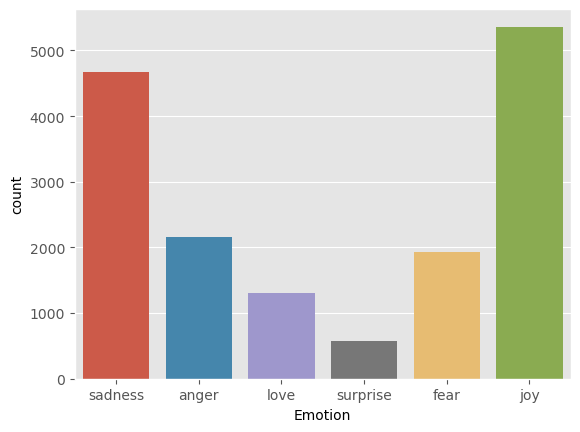

In [8]:
sns.countplot(x=train_data['Emotion'])
plt.show()

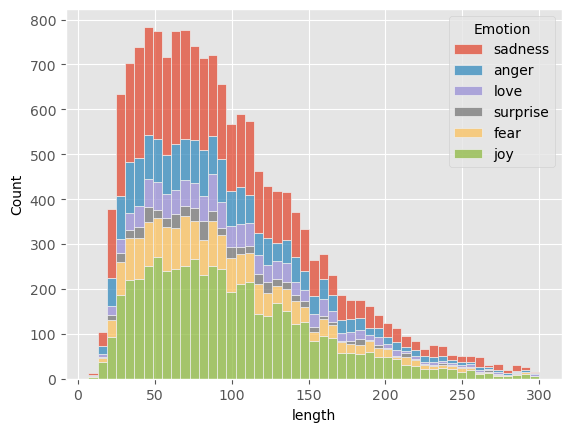

In [9]:
# Create a copy of the train_data DataFrame
df2 = train_data.copy()
df2['length'] = [len(x) for x in train_data['Comment']]
length_value = df2['length'].values
sns.histplot(data=df2, x='length',hue='Emotion',multiple = 'stack')
plt.show()

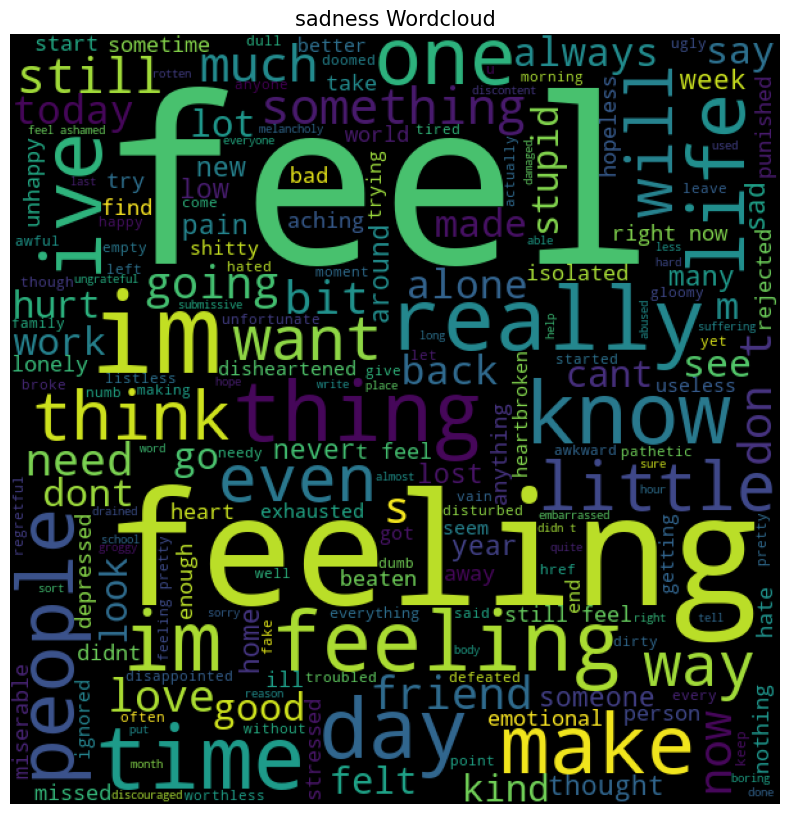

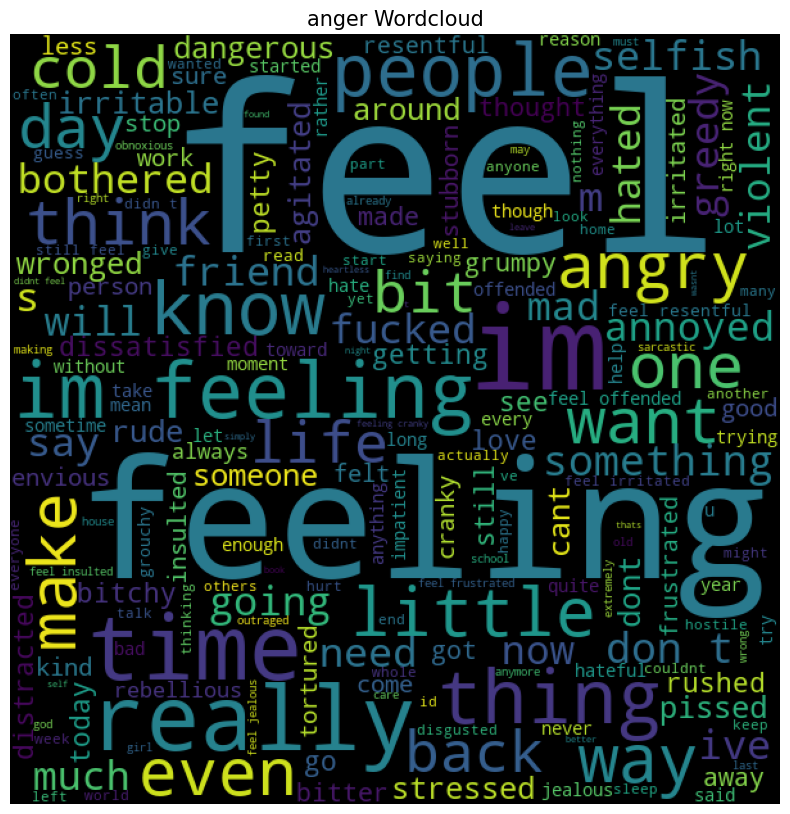

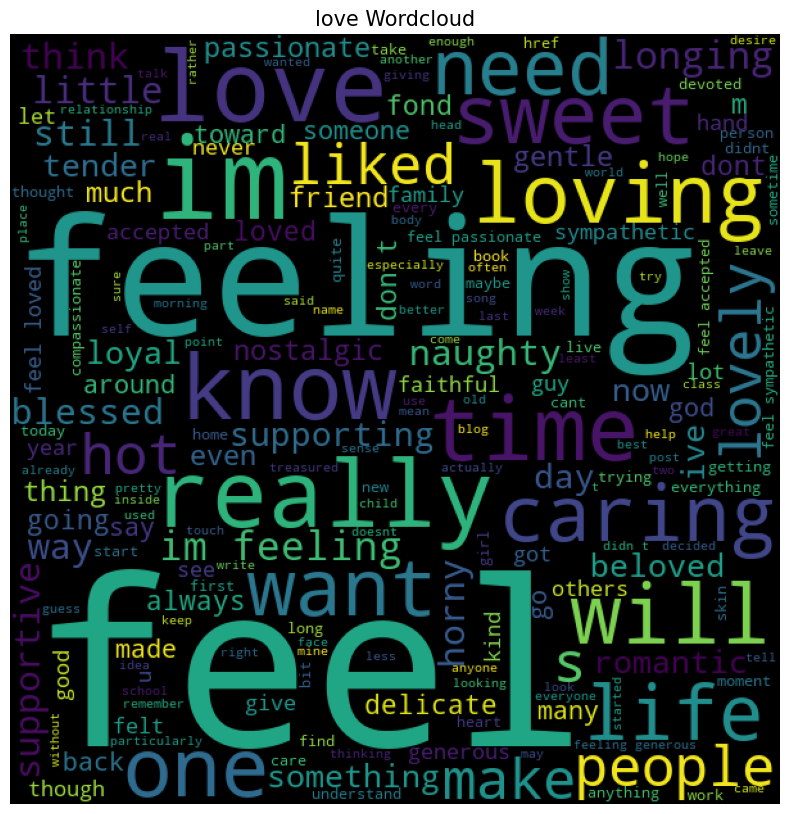

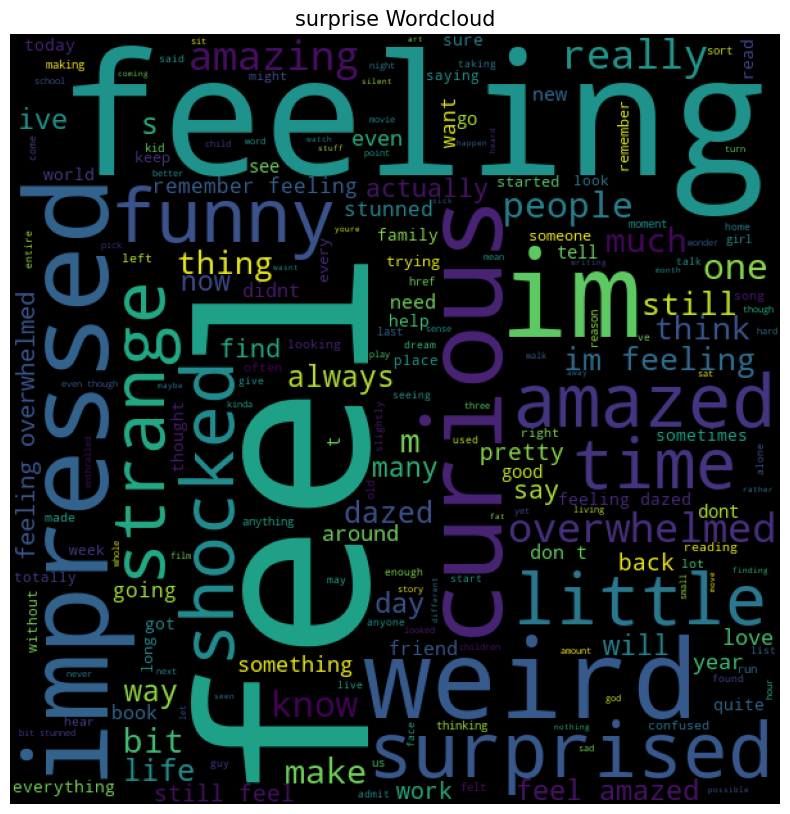

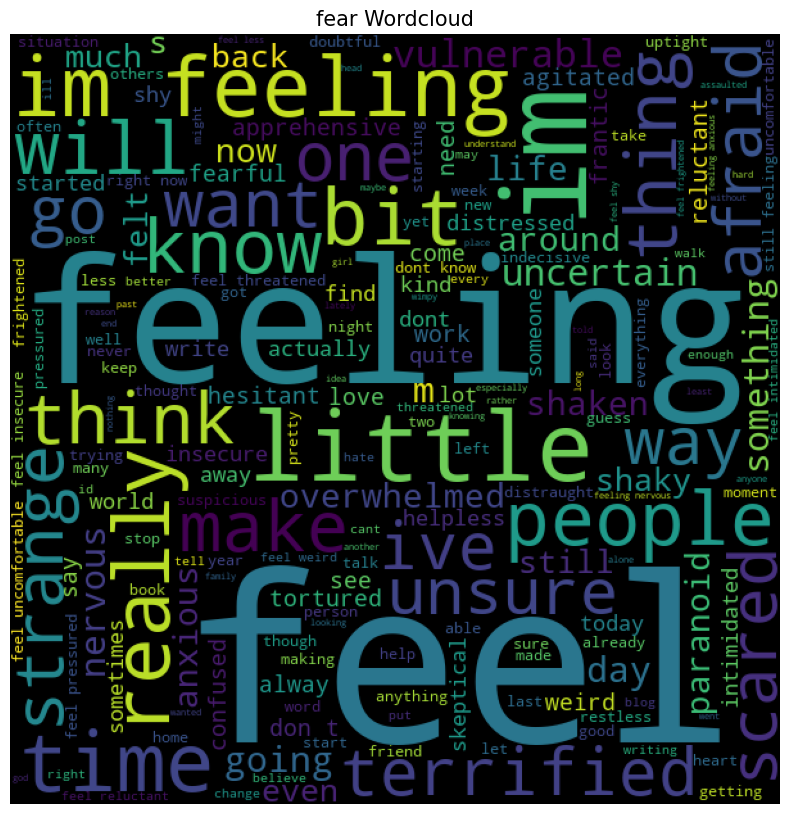

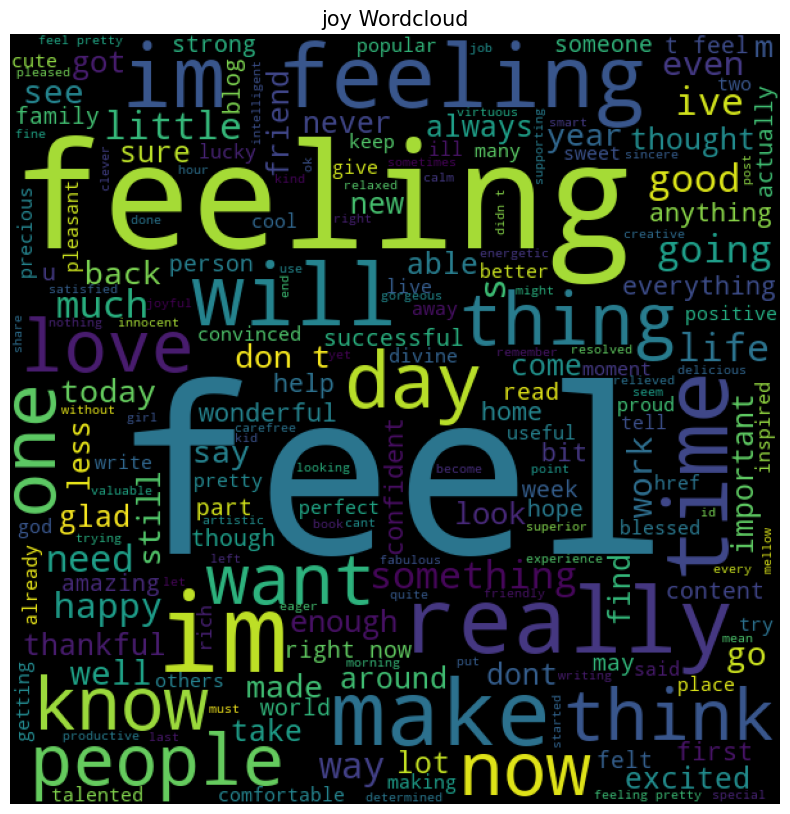

In [10]:
# Define the function to plot word clouds
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10,10))
    plt.title(df + ' Wordcloud', size = 15)
    plt.imshow(wordcloud)
    plt.axis("off")

# Get the list of unique emotions
emotions_list = train_data['Emotion'].unique()

# Generate and plot word clouds for each emotion
for emotion in emotions_list:
    text = ' '.join([sentence for sentence in train_data.loc[train_data['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)


# Data preprocessing

Label Encoding: It transforms categorical labels into integer values. This is useful for algorithms that require numerical input or for improving the performance of certain models.

In [11]:
# Initialize the LabelEncoder
lb = LabelEncoder()

# Fit and transform the 'Emotion' column to numerical values
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

# Display the first few rows of the transformed DataFrame to verify
print(train_data.head())


                                             Comment  Emotion
0                            i didnt feel humiliated        4
1  i can go from feeling so hopeless to so damned...        4
2   im grabbing a minute to post i feel greedy wrong        0
3  i am ever feeling nostalgic about the fireplac...        3
4                               i am feeling grouchy        0


train_test_split:

Used for splitting a dataset into training and testing sets.
CountVectorizer:

Converts a collection of text documents to a matrix of token counts (bag-of-words representation).
TfidfVectorizer:

Converts a collection of text documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which is a more informative representation than raw counts.
MultinomialNB:

Multinomial Naive Bayes classifier, suitable for classification with discrete features (like word counts for text classification).
LogisticRegression:

Logistic Regression classifier, useful for binary and multiclass classification tasks.
RandomForestClassifier:

Random Forest classifier, an ensemble learning method that operates by constructing multiple decision trees during training and outputting the mode of the classes (classification) or mean prediction (regression) of the individual trees.
SVC:

Support Vector Classifier, useful for classification tasks and can handle both linear and non-linear classification.
accuracy_score:

Function to compute the accuracy of the predictions.
classification_report:

Function to generate a detailed classification report, including precision, recall, F1-score, and support for each class.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [13]:
df = train_data.copy()

In [14]:
df.head()

,Comment,Emotion
0,i didnt feel humiliated,4
1,i can go from feeling so hopeless to so damned...,4
2,im grabbing a minute to post i feel greedy wrong,0
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,0


In [18]:
"""tqdm to apply a progress bar to a text preprocessing function applied to a pandas DataFrame. This is useful for providing feedback during the execution of potentially time-consuming operations."""

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm

# Enable progress_apply with tqdm
tqdm.pandas()

# Download NLTK stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

# Define the text cleaning function
def clean_data(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]", " ", text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    text = text.split()  # Split into words
    text = [stemmer.stem(word) for word in text if word not in stopwords]  # Remove stopwords and apply stemming
    return " ".join(text)  # Join words back into a single string

# Display the first few rows of the DataFrame to verify
df['cleaned_comment']  = df['Comment'].progress_apply(clean_data)
# df['cleaned_comment']  = df['Comment'].apply(clean_data) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vinod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|███████████████████████████████████████████████████████████████████████████████████████| 16000/16000 [00:05<00:00, 3132.76it/s]


In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['Emotion'], test_size = 0.2, random_state=42)

In [20]:
# Vectorize the text data using TfidfVectorizer
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [21]:
X_train_tfidf.shape

(12800, 9257)

In [22]:
classifier={
    'MultinomialNB':MultinomialNB(),
    'LogisticRegression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine': SVC(),
}

for name,clf in classifier.items():
    print(f"\n============{name}============")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"======={accuracy_tfidf}============")
    print("Classification Report")
    print(classification_report(y_test, y_pred_tfidf))


============MultinomialNB============
=======0.655============
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


============LogisticRegression============


C:\Users\Vinod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=======0.829375============
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
           4       0.88      0.92      0.90       946
           5       0.77      0.45      0.57       113

    accuracy                           0.83      3200
   macro avg       0.82      0.72      0.76      3200
weighted avg       0.83      0.83      0.82      3200


============Random Forest============
=======0.8503125============
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       427
           1       0.83      0.84      0.83       397
           2       0.84      0.90      0.87      1021
           3       0.81      0.64      0.71       296
           4       0.91      0.90      0.91   

In [23]:
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

C:\Users\Vinod\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    
    predicted_label = lg.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorizer))
    
    return predicted_emotion, label



In [25]:
# Example usage
input_text = "I feel so happy today!"
predicted_emotion = predict_emotion(input_text)
print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: ('joy', 2)


# APPLYING DEEP LEARNING USING LSTM(LONG SHORT TERM MEMORY)

Word Encoding:
- It performs one-hot encoding for each word in the corpus using a vocabulary size of vocab_size.
- The one_hot function (presumably from Keras) is used for one-hot encoding.
- Each word in the corpus is converted to a list of integers representing its one-hot encoded vector.

Padding Sequences:
- It pads the one-hot encoded sequences to have a fixed length of max_len.
- The pad_sequences function (presumably from Keras) is used for padding.
- Sequences are padded with zeros at the beginning (padding="pre").

In [26]:
def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus = []
    for text in df[column]:
        # Clean the text
        text = re.sub("[^a-zA-Z]", " ", text)
        text = text.lower()
        text = text.split()
        text = [stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    
    # One-hot encode the words in the corpus
    one_hot_word = [one_hot(input_text=word, n=vocab_size) for word in corpus]
    
    # Pad the sequences to have a fixed length
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len, padding="pre")
    
    return pad


In [27]:
# Preprocess the text data
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)

# Prepare the labels using one-hot encoding
y_train = to_categorical(train_data["Emotion"])


In [28]:
#LSTM-based neural network model using Keras.
model = Sequential()
model.add(Embedding(input_dim = 11000, output_dim = 150, input_length = 300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train, y_train, epochs = 1, batch_size = 64, verbose = 1, callbacks=[callback])

250/250 [==============================] - 361s 1s/step - loss: 1.4645 - accuracy: 0.4261


Embedding Layer: This layer converts integer indices representing words into dense vectors of fixed size (output_dim). The input_length parameter specifies the length of input sequences.

Dropout Layers: Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.

LSTM Layer: Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) architecture designed to learn long-term dependencies in sequential data. The LSTM layer has 128 units.

Dense Layers: These fully connected layers introduce non-linearity to the model. The first dense layer has 64 units with a sigmoid activation function, followed by a dropout layer. The second dense layer has 6 units (assuming it's a multi-class classification problem) with a softmax activation function to output class probabilities.

Compilation: The model is compiled with the Adam optimizer and categorical crossentropy loss function, suitable for multi-class classification. Accuracy is used as a metric to monitor during training.

Early Stopping Callback: The training process includes an early stopping callback, which monitors validation loss and stops training if the loss does not improve for a certain number of epochs (patience), restoring the best weights.

In [29]:
model.save("model.h5")

In [32]:
def predictive_system_dl(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text = re.sub("[^a-zA-Z]", " ",sentence)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word, n=11000) for word in corpus]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300, padding="pre")
    return pad


In [38]:
# Preprocess input text
cleaned_sentence = predictive_system_dl("I am feeling sad")

# Make prediction
predicted_probabilities = model.predict(cleaned_sentence)

# Get predicted class index and probability
predicted_index = np.argmax(predicted_probabilities)
predicted_probability = np.max(predicted_probabilities)

# Map predicted index to emotion label
predicted_emotion = lb.inverse_transform([predicted_index])[0]

# Print result
print(f"{predicted_emotion} with probability of {predicted_probability}")


1/1 [==============================] - 0s 36ms/step
sadness with probability of 0.6358119249343872
